In [1]:
import numpy as np
from matplotlib import pyplot as pl
import random as rd
import pandas as pd

Vamos avaliar dois algoritmos de agrupamento para tentar encontrar grupos no conjunto de dados gerados abaixo:

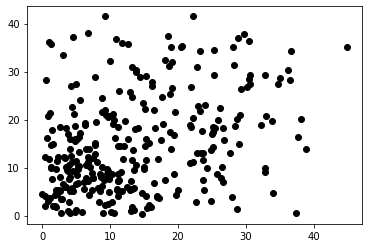

In [74]:
# nº pontos
N = 500

x = np.zeros((N,2))
for i in range(N):
    x[i] = np.random.rand(1,2)*rd.randint(10,45)
    
pl.scatter(x[:,0],x[:,1],c='black')

# K-Clustering

Nesse algoritmo escolhemos $k$ o numero de classes a serem estudadas, e $k$ pontos da distribuição serão selecionados aleatoriamente para serem os centroides dessas classes.

Então a cada iteração calcularemos as distancias entre todos os pontos e cada um dos centroides, e a classe de cada ponto será definida de acordo com o centroide mais próximo. Depois disso, atualizamos a posição de cada um dos centroides tomando a média das posições dos pontos daquela classe, e repetimos até um número máximo de iterações ou até as posições dos centroides não mudarem mais.

In [79]:
class Kclu:
    
    # input: dados x, nº classes k
    def __init__(self,x,K):
        # define as dimensões do problema
        if len(x.shape) == 1:
            self.dim = 1
        else:
            self.dim = x.shape[1]
        
        self.n = len(x)
        self.x = x
        self.k = K
        
        # define as cores
        if self.k > len(color):
            self.cor = rd.choices(color,k=self.k)
        else:
            self.cor = rd.sample(color,self.k)
        
        # centros
        self.centr = self.centros(K)
        # classes de cada ponto
        self.g = np.zeros(self.n)
        
    # define as cores caso mude o nº de classes
    def cores(self,K):
        if K > len(color):
            self.cor = rd.choices(color,k=K)
        else:
            self.cor = rd.sample(color,K)
    
    
    # define os centroides
    def centros(self,K):
        x = self.x
        X = x.tolist()
        c = rd.sample(X,K)
        
        centr = np.array(c)
        self.g = np.zeros(self.n)
            
        self.cores(K)
        self.centr = centr
        self.k = K
        
        return centr
        
        
    # agrupa (nº classes, max iteração)
    def cluster(self,K,it):
        x = self.x
        n = self.n
        c = self.centr.copy()
        g = self.g
        
        # estagnação
        est = 0
        for i in range(it):
            # copia pra comparar se muda depois
            c_copy = np.copy(c)
            
            # pra cada ponto
            for j in range(n):
                # lista as dist até os centroides
                D = []
                for k in range (K):
                    dis = dist(x[j],c[k])
                    D.append(dis)
                # define aa classes
                g[j] = np.argmin(D)
            
            # pra cada classe
            for k in range (K):
                C = []
                for j in range(n):
                    if g[j] == k:
                        C.append(x[j])
                # pontos que pertencem a essa classe
                C = np.array(C)
                
                if len(C) != 0:
                    for d in range (self.dim):
                        # redefine os centroides
                        c[k,d] = np.mean(C[:,d])
            
            # se nada muda, parar iterações
            I = 0
            for e, d in zip(c,c_copy):
                if np.array_equal(e,d) == True:
                    I = I+1
                    
            # se estagnar por 5 iterações seguidas, para o programa
            if I == len(c):
                est = est + 1
                if est == 5:
                    print('Estabilidade alcançada em i =',i-est)
                    break
            else:
                est = 0

            self.centr = c
            
    
    # avalia a performance (nº limite de classes, nº itera por classe)
    def perf(self,K,it):
        inert = np.zeros(K-2)
        dunn = np.zeros(K-2)
        
        # não dá pra calcular dunn pra só 1 classe
        for k in range(2,K,1):
            self.centros(k)
            self.cluster(k,it)
            inert[k-2] = self.inertia()
            dunn[k-2] = self.dunn()
    
        classes = np.arange(2,K,1)
        
        # plota bonitinho
        fig, ax1 = pl.subplots()
        ax2 = ax1.twinx()
        
        ax1.plot(classes,np.max(dunn)*inert/np.max(inert),'b-',color='lime')
        ax2.plot(classes,dunn,'b-',color='b')
        
        ax1.set_xlabel('# classes')
        ax1.set_ylabel('Inercia',color='lime')
        ax2.set_ylabel('Dunn',color='b')
        pl.show()
            
            
    # soma das dist. pontos-centroide y
    def inert(self,y):
        x = self.x
        c = self.centr
        g = self.g
        n = self.n
        d = 0
        for j in range(n):
            if g[j] == y:
                d = d + dist(x[j],c[y])
        return d
    
    
    # soma das dist. ponto-centroide pra todas as classes
    def inertia(self):
        d = 0
        for y in range(self.k):
            d = d + self.inert(y)
        return d
    
        
    # indice de Dunn = min(dist grupos)/max(inert)
    def dunn(self):
        c = self.centr 
        Dg = []
        Di = []
        for i in range (self.k):
            Di.append(self.inert(i))
            for j in range (i+1,self.k,1):
                Dg.append(dist(c[i],c[j]))
        
        return np.min(Dg)/np.max(Di)  
    
    
    # testa 1 imput
    def test(self,x):
        c = self.centr
        K = self.k
        D = []
        for k in range (K):
            D.append(dist(x,c[k]))
        
        m = np.argmin(D)
        print(x,'pertence ao grupo',self.cor[m])
        pl.scatter(x[0],x[1],c='r')
        self.drawg()
             
    
    # desenha os pontos (só funciona pra x 2D!!!)
    def draw(self):
        x = self.x
        c = self.centr
        pl.scatter(x[:,0],x[:,1],c='black')
        pl.scatter(c[:,0],c[:,1],c='red')
              
    # desenha os pontos agrupados (só funciona pra x 2D!!!)
    def drawg(self):
        g = np.array([self.g])
        X = np.concatenate((self.x,g.T),axis=1)
        c = self.centr
        cor = self.cor
        
        for k in range(self.k):
            Y = X[X[:,self.dim]==k]
            pl.scatter(Y[:,0],Y[:,1],c=cor[k])

        
color = ['blue','green','aquamarine','m','black','yellow','orange','indigo','lime','violet','aqua','gray','tomato','sienna','navy','khaki']
#16 cores
        
def dist(x1,x2):
    d2 = 0
    if type(x1) == int:
        d2 = d2 + (x1-x2)**2
    else:
        for i in range (len(x1)):
            d2 = d2 + (x1[i]-x2[i])**2
        
    return np.sqrt(d2)

Vamos testar nos nossos pontos

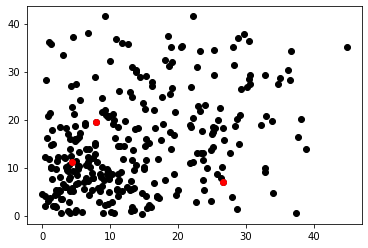

In [83]:
# nº de classes
klas = 3
cl = Kclu(x,klas)

# desenhar os pontos e os centroides escolhidos (vermelho)
cl.draw()
pl.show()

Estabilidade alcançada em i = 4


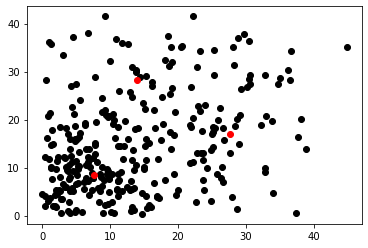

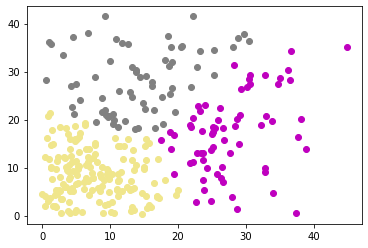

In [84]:
# começar o agrupamento (nº classes e max iterações)
cl.cluster(klas,100)

# desenhar os pontos e os centroides escolhidos (vermelho)
pl.subplot(1,1,1)
cl.draw()
pl.show()

# desenha os pontos divididos por classe
pl.subplot(1,1,1)
cl.drawg()
pl.show()

Podemos também avaliar a performance de diferentes ajuste usando as métricas Inércia e Índice de Dunn:

A Inércia é definida como a soma das distâncias entre os pontos e os centroides de cada classe; como queremos classes bem definidas esperamos que este valor seja pequeno, pois isso significaria que a maioria dos pontos está perto do centro de sua própria classe.

O Índice de Dunn é definido como a razão da menor distância entre os centroides dividida sobre o maior dos valores de Inércia; assim, classes bem definidas implicará num Índice de Dunn grande, já que isso seria equivalente a centroides bem separados.

Estabilidade alcançada em i = 9
Estabilidade alcançada em i = 14
Estabilidade alcançada em i = 14
Estabilidade alcançada em i = 6
Estabilidade alcançada em i = 5
Estabilidade alcançada em i = 12
Estabilidade alcançada em i = 10


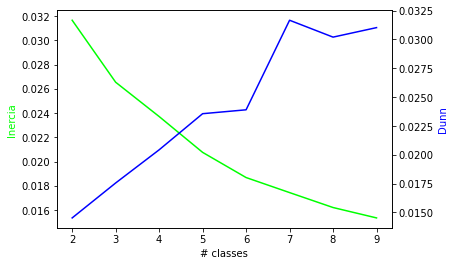

In [86]:
# n max de classes que queremos testar a performance
nk = 10
cl.perf(nk,20)

# como o valor absoluto dessas métricas não é importante,
# plotamos apenas os valores relativos

O número de classes pode ser ajustado arbitrariamente para otimizar cada um destas métricas, mas uma escolha interessante seria o número que equilibra as duas coisas. Neste caso, a julgar pelo gráfico acima vemos que o nª de classes "real" parece ser 4 ou 5.

(É importante lembrar que como a escolha dos centroides iniciais foi aleatória, isso pode acarretar em resultados diferentes cada vez que rodamos o algoritmo num mesmo conjunto de dados, então é sempre bom refazermos esta análise da performance várias vezes antes de falar com confiança sobre nº de classes "real")

In [87]:
# vamos refazer com o aparente numero de classes real
klas = 4

# redefinis os centroides
cl.centros(klas)
cl.cluster(klas,100)

Estabilidade alcançada em i = 2


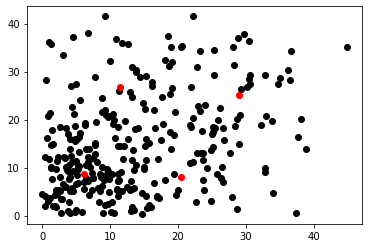

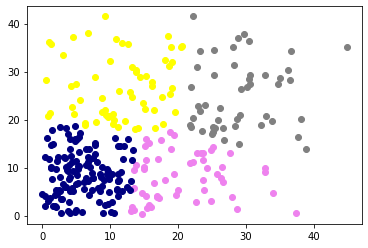

In [88]:
# desenhar os pontos e os centroides escolhidos (vermelho)
pl.subplot(1,1,1)
cl.draw()
pl.show()

# desenha os pontos divididos por classe
pl.subplot(1,1,1)
cl.drawg()
pl.show()

In [89]:
# e agora com um nº de classes enorme
nk = 9

# redefinis os centroides
cl.centros(nk)
cl.cluster(nk,150)

Estabilidade alcançada em i = 9


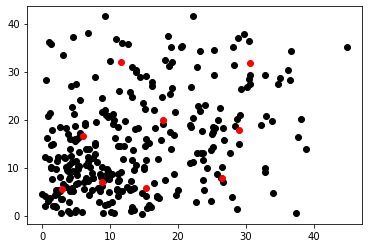

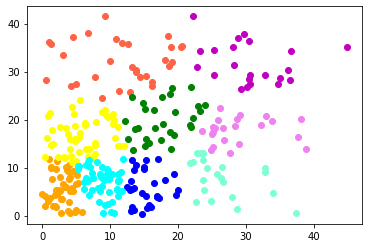

In [90]:
# desenhar os pontos e os centroides escolhidos (vermelho)
pl.subplot(1,1,1)
cl.draw()
pl.show()

# desenha os pontos divididos por classe
pl.subplot(1,1,1)
cl.drawg()
pl.show()

Grupos que existem: ['violet', 'orange', 'aquamarine', 'blue', 'yellow', 'tomato', 'green', 'aqua', 'm'] 


(20, 10) pertence ao grupo blue


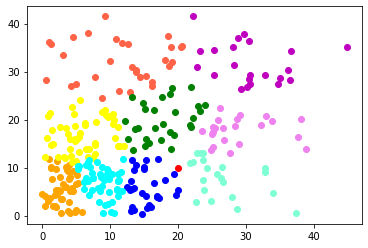

In [93]:
print('Grupos que existem:',cl.cor,'\n\n')

# testar um novo ponto
y = (20,10)
cl.test(y)

# Mean-shift

No Mean-shift não definimos o nª de classes, esse valor será definido no final do algoritmo.

Começamos escolhendo uma parcela dos pontos aleatoriamente para serem os centróides e os atualizando da mesma forma que no K-means, mas agora definimos também um raio $R$ no qual, se dois centroides se encontrarem a uma distância menor do que $2R$, o que tiver menos pontos próximos de si será excluido. Ao longo das iterações teremos cada vez menos centroides, até que (preferencialmente) só sobrarão os que representam classes "reais".

In [135]:
class Mshift:
    
    # dados x
    def __init__(self,x):
        if len(x.shape) == 1:
            self.dim = 1
        else:
            self.dim = x.shape[1]
        
        self.n = len(x)
        self.x = x
        self.centr = self.centros()
        
    
    # define os centroides inicialmente
    def centros(self):
        x = self.x
        X = x.tolist()
        # numero inicial de "classes"
        # (20% dos pontos)
        self.K = np.int(np.round(self.n/5))

        # lista com posições dos centroides
        C = rd.sample(X,self.K)
        self.g = np.zeros(self.n)

        centr = np.array(C)
        self.C = C
        return centr
    
    
    # agrupar, raio r, e iterações
    def cluster(self,r,it):
        self.centros()
        x = self.x
        n = self.n
        C = self.C
        g = self.g
        centr = np.array(C)
        
        # estagnação 
        est = 0
        for i in range(it):
            # pra comparar se muda depois
            c_copy = np.copy(C)
            # guarda quantos pontos tem dentro de cada circulo
            dens = np.zeros(len(C))
            for j in range(len(C)):
                I = []
                for k in range(n):
                    dis = dist(C[j],x[k])
                    if dis <= r:
                        I.append(x[k])
                
                I = np.array(I)
                dens[j] = len(I)
                if dens[j] != 0:
                    for d in range (self.dim):
                        # atualiza a posição dos centroides
                        centr[j,d] = np.mean(I[:,d])
                C[j] = centr[j]
            
            # checa se ocorre overlap dos circulos
            death = [0]*len(C)
            for j in range(0,len(C)):
                for k in range(j+1,len(C)):
                    dis = dist(C[j],C[k])
                    if dis <= 2*r:
                        if dens[j] >= dens[k]:
                            death[k] = 1
                        else:
                            death[j] = 1
            
            j = 0
            # elimina redundancias
            while j < len(death):
                if death[j] == 1:
                    del C[j]
                    del death[j]
                    j =- 1
                j = j + 1
            
            # se nada muda, parar iterações
            I = 0
            for c,d in zip(C,c_copy):
                if np.array_equal(c,d) == True:
                    I = I + 1
            
            # estagnação por 5 iterações seguidas para o programa
            if I == len(C):
                est = est + 1
                if est == 5:
                    print('Estabilidade alcançada em i =',i-est)
                    break
            else:
                est = 0
            
        self.C = C
        self.centr = np.array(C)
        
        # classifica os pontos
        for j in range(n):
            I = []
            for k in range (len(C)):
                dis = dist(x[j],C[k])
                I.append(dis)
            if len(I) != 0:
                g[j] = np.argmin(I)
        self.g = g
        
        self.K = len(C)
        
        # define as cores
        if self.K > len(color):
            self.cor = rd.choices(color,k=self.K)
        else:
            self.cor = rd.sample(color,self.K)
        
        #print(self.K,'classes finais.')
    
    
    # avalia a performance (raio inf, raio sup, nº itera por raio)
    def perf(self,rmin,rmax,it):
        R = np.linspace(rmin,rmax,10)
        clas = np.zeros(10)
        inert = np.zeros(10)
        dunn = np.zeros(10)
        
        for i in range(len(R)):
            self.centros()
            self.cluster(R[i],it)
            inert[i] = self.inertia()
            dunn[i] = self.dunn()
            clas[i] = self.K

        fig, ax1 = pl.subplots()
        ax2 = ax1.twinx()
        
        ax1.plot(R,np.max(dunn)*inert/np.max(inert),c='lime')
        ax1.set_xlabel('Raio')
        ax1.set_ylabel('Inercia',color='lime')
        ax2.set_ylabel('Dunn',color='b')
        ax2.plot(R,dunn,c='b')
        pl.show()        
        return clas
        
      
    # soma das dist. pontos-centroide y
    def inert(self,y):
        x = self.x
        c = self.centr
        g = self.g
        n = self.n
        
        d = 0
        for j in range(n):
            if g[j] == y:
                d = d + dist(x[j],c[y])
        return d
    
    # soma das dist. ponto-centroide pra todas as classes
    def inertia(self):
        d = 0
        for y in range(self.K):
            d = d + self.inert(y)
        return d
    
        
    # indice de Dunn = min(dist grupos)/max(inert)
    def dunn(self):
        c = self.centr 
        Dg = []
        Di = []
        for i in range (self.K):
            Di.append(self.inert(i))
            for j in range (i+1,self.K,1):
                Dg.append(dist(c[i],c[j]))
        
        return np.min(Dg)/np.max(Di)  

    
    # testa 1 imput
    def test(self,x):
        c = self.centr
        K = self.K
        D = []
        for k in range (K):
            D.append(dist(x,c[k]))
        
        m = np.argmin(D)
        print(x,'pertence ao grupo',self.cor[m])
        pl.scatter(x[0],x[1],c='r')
        self.drawg()
    
    
    # desenha os pontos (só funciona pra x 2D!!!)
    def draw(self):
        x = self.x
        c = self.centr
        pl.scatter(x[:,0],x[:,1],c='black')
        pl.scatter(c[:,0],c[:,1],c='red')
              
    # desenha os pontos agrupados (só funciona pra x 2D!!!)
    def drawg(self):
        g = np.array([self.g])
        X = np.concatenate((self.x,g.T),axis=1)
        c = self.centr
        cor = self.cor
        
        for k in range(self.K):
            Y = X[X[:,self.dim]==k]
            pl.scatter(Y[:,0],Y[:,1],c=self.cor[k])

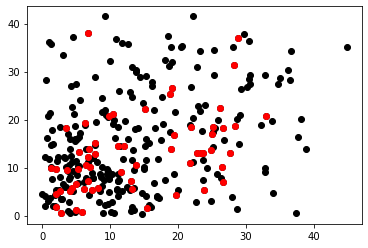

# classes iniciais: 60


In [142]:
ms = Mshift(x)

# desenhar os pontos e os centroides escolhidos (vermelho)
ms.draw()
pl.show()

print('# classes iniciais:',ms.K)

In [143]:
# Agrupar (raio, iterações)
ms.cluster(5,100)
print(ms.K,'classes')

Estabilidade alcançada em i = 2
3 classes


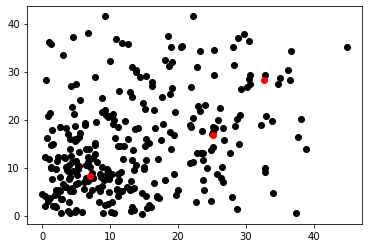

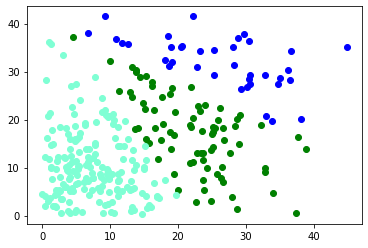

In [144]:
# desenhar os pontos e os centroides escolhidos (vermelho)
pl.subplot(1,1,1)
ms.draw()
pl.show()

# desenha os pontos divididos por classe
pl.subplot(1,1,1)
ms.drawg()
pl.show()

Você deve perceber que este algoritmo também é sensível às escolhas iniciais aleatórias, além de depender da definição de um parâmetro $R$ aparentemente arbitrário. Para diminuir essa arbitrariedade na escolha de $R$ podemos repetir a análise que fizemos para o K-means levando em conta diferentes valores de $R$

Estabilidade alcançada em i = 5
Estabilidade alcançada em i = 2
Estabilidade alcançada em i = 3
Estabilidade alcançada em i = 3
Estabilidade alcançada em i = 9
Estabilidade alcançada em i = 13
Estabilidade alcançada em i = 7
Estabilidade alcançada em i = 2
Estabilidade alcançada em i = 5
Estabilidade alcançada em i = 5


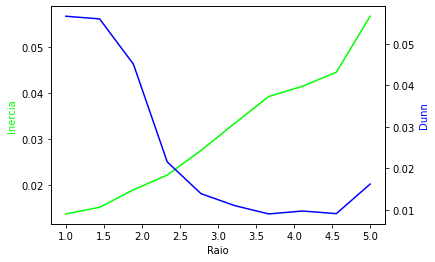

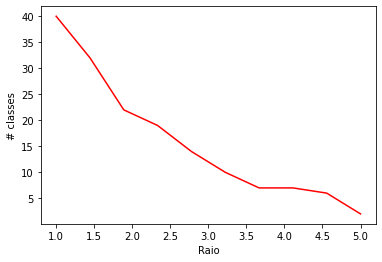

In [145]:
rmin, rmax = 1, 5

# avalia a performance (raio inf, raio sup, nº itera por raio)
y = ms.perf(rmin,rmax,30)

r = np.linspace(rmin,rmax,10)
pl.subplot(1,1,1)
pl.plot(r,y,c='r')
pl.xlabel('Raio')
pl.ylabel('# classes')
pl.show()